# Knapsack Problem with Quantum Annealers

**Alumno:** Álvaro Manuel Aparicio Morales

**Curso:** 2024/2025 - I CERTIFICADO DE EXTENSIÓN UNIVERSITARIA EN COMPUTACIÓN CUÁNTICA

**Módulo 5:** Inteligencia Artificial Cuántica


> Nota: Para la correcta ejecución, es necesario crear una carpeta en el entorno local de google colab con los archivos .txt y sustituir el nombre de la carpeta en la variable knapsack_folder tal y como se muestra en la imagen.
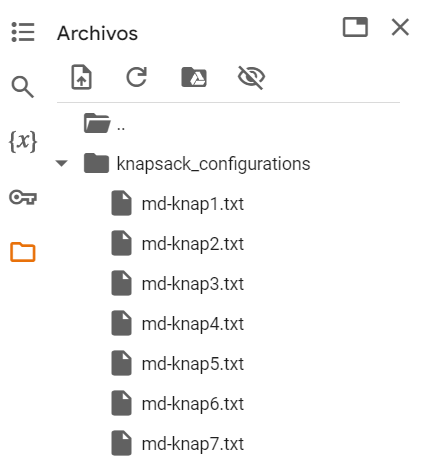


We first install the Ocean SDK (D-Wave software).

In [ ]:
!pip install dwave-ocean-sdk networkx

Now we need to configure the environment (press 'enter' to use the default options). If you have an API key to use D-Wave systems, you can enter the key at this stage.

In [ ]:
!dwave setup

Import the required libraries.

In [68]:
from dimod import Binary, ExactSolver
from networkx import Graph, draw
from dwave.samplers import SimulatedAnnealingSampler, SteepestDescentSampler
from dwave.system import DWaveSampler, EmbeddingComposite, LeapHybridCQMSampler
from dimod import ConstrainedQuadraticModel, Binary
import os

# Funciones Auxiliares

In [69]:
def get_sampler():
  #return ExactSolver()
  #return SimulatedAnnealingSampler()
  #return SteepestDescentSampler()
  #return EmbeddingComposite(DWaveSampler())
  return LeapHybridCQMSampler()

In [93]:
"""
Función encargada de leer los ficheros de valores del problema de la mochila
y devolverlos en un array.

"""
def read_knapsack_files(folder):
  knapsack_files_name = [file for file in os.listdir(knapsack_folder) if file.endswith('.txt')]
  print(knapsack_files_name)
  knapsack_values_array = []
  for file in knapsack_files_name:
    with open(os.path.join(knapsack_folder, file), 'r') as f:
        data_file = f.read().split()
        variable_number = int(data_file[0])
        constraint_number = int(data_file[1])
        optimal_solution_value = float(data_file[2])
        item_values = []
        last_item_value = 3+variable_number
        for i in range(3,last_item_value):
            item_values.append(float(data_file[i]))
        #print (item_values)
        # Obteniendo matriz de restricciones
        constraints = []
        last_constraint_value = 0
        for i in range(constraint_number):
            constraint_values = []
            start_index = last_item_value + i*variable_number
            final_index = last_item_value + (i+1)*variable_number
            for j in range(start_index,final_index):
                constraint_values.append(int(data_file[j]))
            constraints.append(constraint_values)
            last_constraint_value = final_index
        # Obteniendo los límites de restricciones
        limits_constraints = []
        limits_range = last_constraint_value+constraint_number
        for k in range(last_constraint_value,limits_range):
          limits_constraints.append(int(data_file[k]))
        #print(limits_constraints)
        # Incorporamos los valores del archivo de knapsack a la lista de valores de knapsacks
        knapsack_values_array.append([variable_number, constraint_number, optimal_solution_value, item_values ,constraints, limits_constraints, file])
  return knapsack_values_array


In [94]:
"""
Función encargada de construir el modelo cuadrático con restricciones
del problema de la mochila.

"""
def cuadratic_constrained_model(knapsack_values_array):
  dwave_cuadratic_constraint_model = ConstrainedQuadraticModel()
  # Creamos las variables binarias
  variables = []
  for i in range(knapsack_values_array[0]):
    variables.append(Binary(f'v{i}'))

  sumatorio = 0
  for i in range(knapsack_values_array[0]):
    sumatorio += (variables[i] * knapsack_values_array[3][i]) # Los valores de los items se encuentran en el índice 3

  # Como queremos maximizar, para convertirlo en un problema de minimización le añadimos el signo menos
  dwave_cuadratic_constraint_model.set_objective((-1)*sumatorio)

  # Añadimos las restricciones
  for i in range(knapsack_values_array[1]):
    sumatorio = 0
    for j in range(knapsack_values_array[0]):
      sumatorio += variables[j] * knapsack_values_array[4][i][j] # Las restricciones se encuentran en la posición 4
    dwave_cuadratic_constraint_model.add_constraint(sumatorio <= knapsack_values_array[5][i], label=f'constraint_{i}') # Los límites de las restricciones se encuentran en la posicion 5

  return dwave_cuadratic_constraint_model

# Programa principal

In [95]:
# Lectura de ficheros knapsack
knapsack_folder = "knapsack_configurations"  # Insertar el nombre de la carpeta que contiene los archivos de knapsack
#knapsack_folder = "testing_folder"

knapsack_values_array = read_knapsack_files(knapsack_folder)
#print(knapsack_values_array)

"""
Una vez obtenidos el número de variables, restricciones y
sus respectivos valores y límites. Haciendo uso de la
librería de D-Wave, construiremos el modelo cuadrático con restricciones.
"""

for knapsack_elem in knapsack_values_array:
  knapsack_elem_cuadratic_model = cuadratic_constrained_model(knapsack_elem) # Construimos el modelo de restricciones cuadrático
  sampler = get_sampler()
  result = sampler.sample_cqm(knapsack_elem_cuadratic_model, label=knapsack_elem[6])

  print((knapsack_elem[6],str(knapsack_elem[2]),result.first.energy, result.first))


['md-knap6.txt', 'md-knap3.txt', 'md-knap7.txt', 'md-knap4.txt', 'md-knap2.txt', 'md-knap1.txt', 'md-knap5.txt']
('md-knap6.txt', '10618.0', -10630.0, Sample(sample={'v0': 1.0, 'v1': 0.0, 'v10': 1.0, 'v11': 0.0, 'v12': 1.0, 'v13': 1.0, 'v14': 1.0, 'v15': 1.0, 'v16': 1.0, 'v17': 0.0, 'v18': 1.0, 'v19': 1.0, 'v2': 0.0, 'v20': 1.0, 'v21': 1.0, 'v22': 1.0, 'v23': 0.0, 'v24': 1.0, 'v25': 1.0, 'v26': 1.0, 'v27': 1.0, 'v28': 1.0, 'v29': 1.0, 'v3': 1.0, 'v30': 1.0, 'v31': 1.0, 'v32': 1.0, 'v33': 1.0, 'v34': 1.0, 'v35': 0.0, 'v36': 1.0, 'v37': 1.0, 'v38': 1.0, 'v4': 0.0, 'v5': 1.0, 'v6': 1.0, 'v7': 1.0, 'v8': 1.0, 'v9': 0.0}, energy=-10630.0, num_occurrences=1, is_satisfied=array([ True,  True,  True,  True, False]), is_feasible=False))
('md-knap3.txt', '4015.0', -4105.0, Sample(sample={'v0': 1.0, 'v1': 1.0, 'v10': 0.0, 'v11': 0.0, 'v12': 0.0, 'v13': 1.0, 'v14': 1.0, 'v2': 1.0, 'v3': 1.0, 'v4': 0.0, 'v5': 1.0, 'v6': 1.0, 'v7': 0.0, 'v8': 1.0, 'v9': 1.0}, energy=-4105.0, num_occurrences=1, is_sa

In [ ]:
!dwave config create